In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ElasticNet 

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

## Data Extraction

In [6]:
Data_frame = pd.read_csv(fr"C:\Users\surya\OneDrive\Desktop\House_Rent_Dataset.csv")
Data_frame.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data Pre-processing

In [7]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
Data_frame.drop(['Area Locality','Point of Contact'],inplace=True,axis=1)
Data_frame.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


## Exploratory Data Analysis

<AxesSubplot:xlabel='BHK', ylabel='count'>

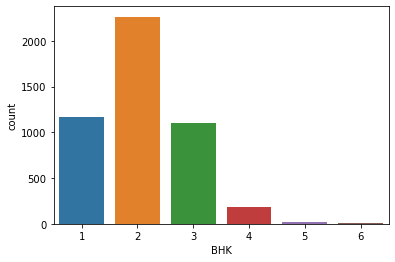

In [9]:
sns.countplot(data=Data_frame,x=Data_frame['BHK'])

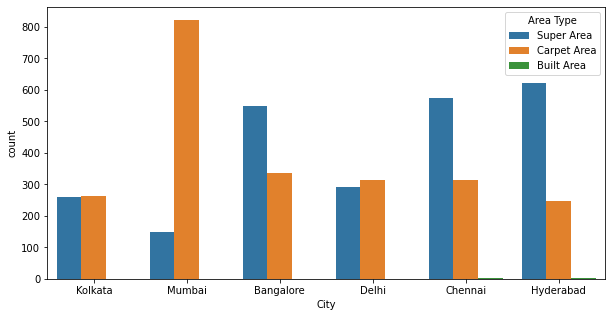

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=Data_frame,x=Data_frame['City'],hue=Data_frame['Area Type'])
plt.show()

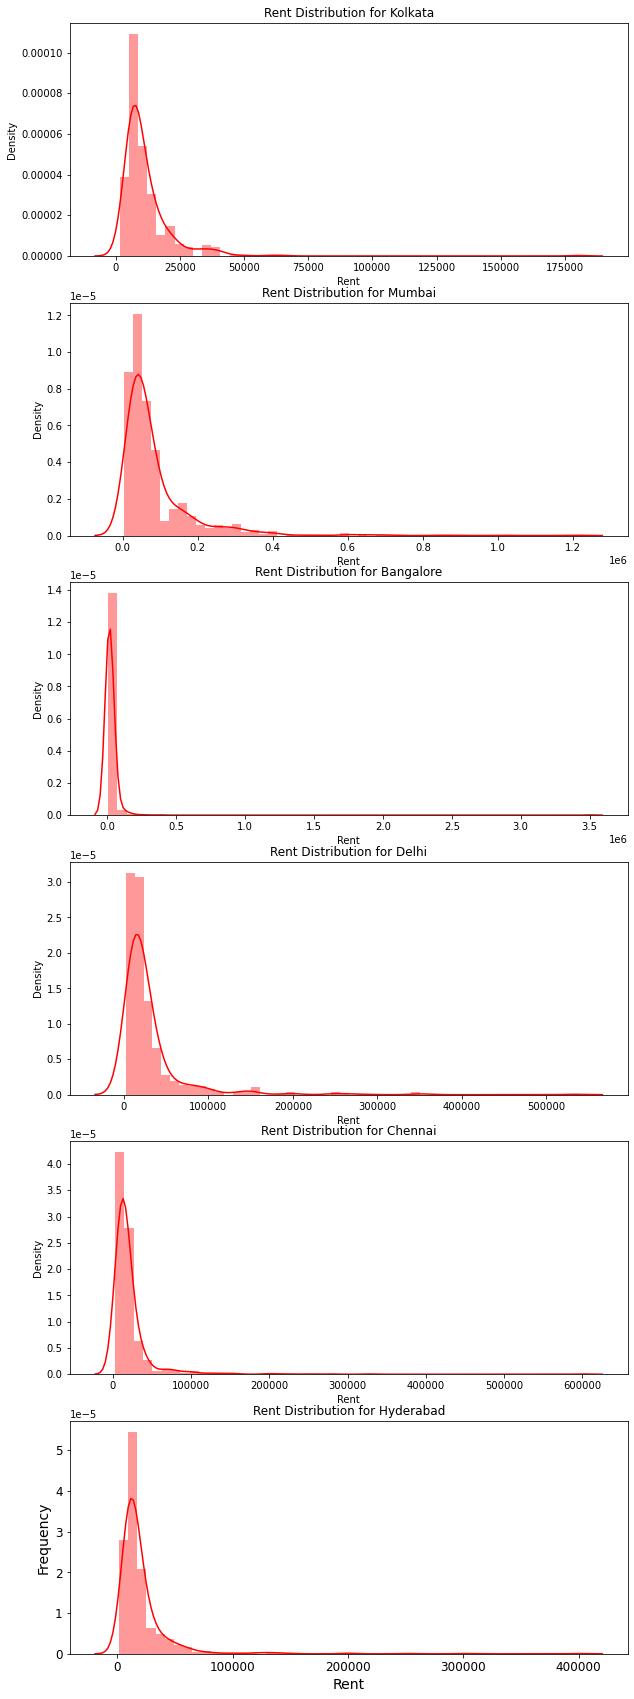

In [11]:
#Distribution plot for the rent
plots = len(list(Data_frame['City'].unique()))
fig,axes = plt.subplots(6,1,figsize = (10,30))
Cities = list(Data_frame['City'].unique())
i = 0
# plt.figure(figsize=(10,5))
for city in Cities:
    df = Data_frame[Data_frame['City']==city]
    sns.distplot(df['Rent'], color = 'r',ax=axes[i])
    axes[i].set_title(fr"Rent Distribution for {city}")
    i += 1
    plt.xlabel('Rent', fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

In [12]:
#Visualizing the cities rent based on bedrooms
d = Data_frame.groupby(by=['BHK','City'],as_index=False).mean()

In [13]:
d.drop(['Size','Bathroom'],inplace=True,axis=1)
d.sample(5)

,BHK,City,Rent
16,3,Kolkata,19666.576087
23,4,Mumbai,279109.589041
14,3,Delhi,44141.558442
31,6,Kolkata,20000.000000
2,1,Delhi,11332.500000


<AxesSubplot:xlabel='City', ylabel='Rent'>

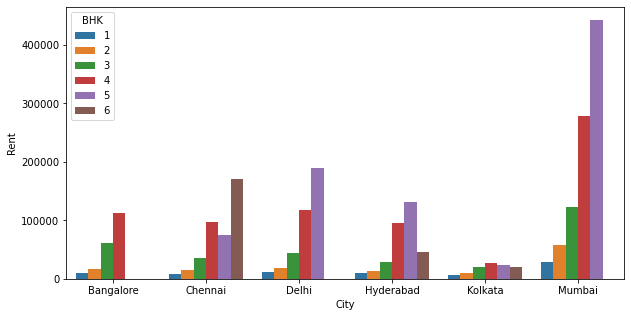

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=d['City'],y=d['Rent'],hue=d['BHK'])

<AxesSubplot:>

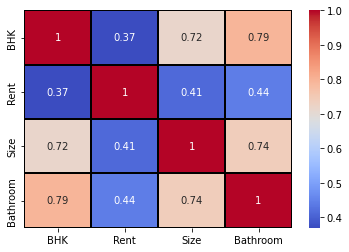

In [15]:
#Correlation analysis for with categorical variables
sns.heatmap(data=Data_frame.corr(),annot=True,linecolor='black',linewidths=0.2,cmap='coolwarm')

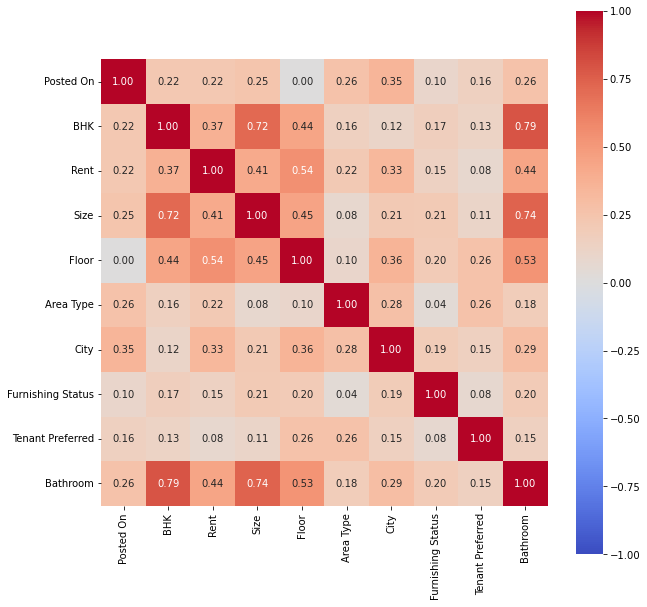

In [16]:
#Correlation analysis for without categorical variables
categorical_features=identify_nominal_columns(Data_frame)
complete_correlation= associations(Data_frame, 
                                   filename= fr"C:\Users\surya\OneDrive\Desktop\complete_correlation.png", 
                                   figsize=(10,10),cmap='coolwarm')

In [17]:
#By the above correlation matrix removing the unnecessary columns from the dataset which is having less than 0.3 corr value
Data_frame.drop(['Area Type','Posted On','Furnishing Status','Tenant Preferred'],inplace=True,axis=1)
Data_frame.head()

,BHK,Rent,Size,Floor,City,Bathroom
0,2,10000,1100,Ground out of 2,Kolkata,2
1,2,20000,800,1 out of 3,Kolkata,1
2,2,17000,1000,1 out of 3,Kolkata,1
3,2,10000,800,1 out of 2,Kolkata,1
4,2,7500,850,1 out of 2,Kolkata,1


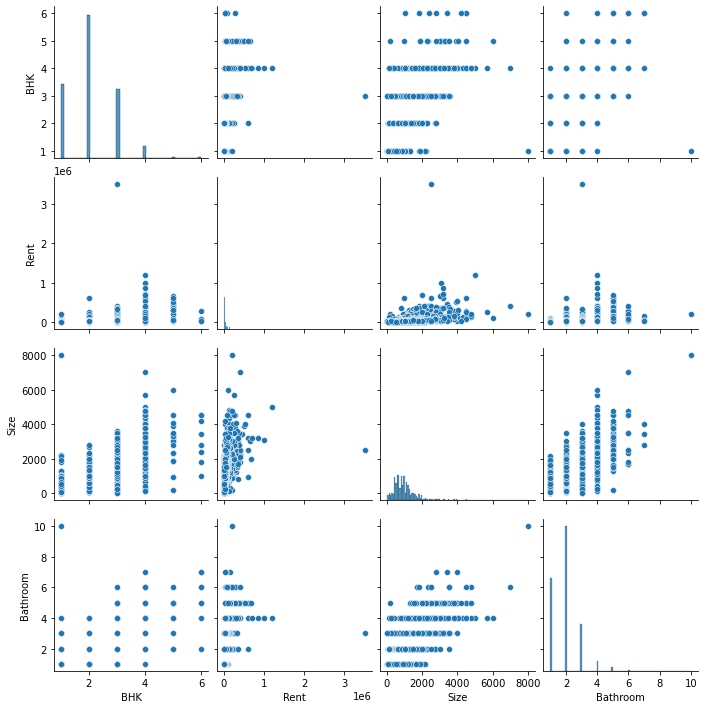

In [18]:
sns.pairplot(data=Data_frame)